In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [40]:
# Importing the train dataset
train_data = pd.read_csv("/Users/priyashaji/Documents/virtual hackathon/tims_train_data.csv")
train_data.shape

(24, 6)

In [41]:
# Importing the test dataset
test_data = pd.read_csv("/Users/priyashaji/Documents/virtual hackathon/tims_test_data.csv")
test_data.shape

(60, 6)

In [42]:
train_data.head()

,TRAIN_NAME,LINE,STATION_NAME,CAR_NO,CAR_OCCUPANCY_INDICATOR,UPDATE_DATE_TIME
0,1530,NEW HAVEN,GCT,4501,RED,7/1/20 13:05
1,1530,NEW HAVEN,GCT,4502,GREEN,7/1/20 13:05
2,1530,NEW HAVEN,GCT,4503,RED,7/1/20 13:05
3,1530,NEW HAVEN,GCT,4500,YELLOW,7/1/20 13:05
4,1530,NEW HAVEN,HARLEM 125TH STREET,4501,RED,7/1/20 13:14


In [43]:
train_data.dtypes

TRAIN_NAME                  int64
LINE                       object
STATION_NAME               object
CAR_NO                      int64
CAR_OCCUPANCY_INDICATOR    object
UPDATE_DATE_TIME           object
dtype: object

In [44]:
test_data.head()

,TRAIN_NAME,LINE,STATION_NAME,CAR_NO,CAR_OCCUPANCY_INDICATOR,UPDATE_DATE_TIME
0,1530,NEW HAVEN,SOUTH NORWALK,4500,YELLOW,7/1/20 14:07
1,1530,NEW HAVEN,SOUTH NORWALK,4502,GREEN,7/1/20 14:07
2,1530,NEW HAVEN,SOUTH NORWALK,4501,RED,7/1/20 14:07
3,1530,NEW HAVEN,SOUTH NORWALK,4503,RED,7/1/20 14:07
4,1530,NEW HAVEN,EAST NORWALK,4503,RED,7/1/20 14:10


In [45]:
#my_submission = pd.DataFrame({'id_code': test_data['id_code']})
#my_submission.head()

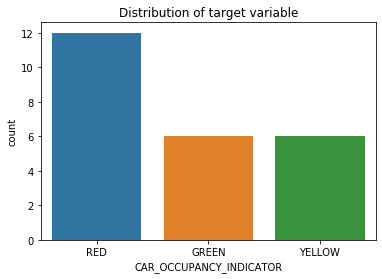

In [46]:
plt.title('Distribution of target variable')
sns.countplot(train_data['CAR_OCCUPANCY_INDICATOR'])
plt.show()

In [47]:
# Studying the target variable
train_data['CAR_OCCUPANCY_INDICATOR'].value_counts()

RED       12
GREEN      6
YELLOW     6
Name: CAR_OCCUPANCY_INDICATOR, dtype: int64

In [48]:
train_data.isna().sum()

TRAIN_NAME                 0
LINE                       0
STATION_NAME               0
CAR_NO                     0
CAR_OCCUPANCY_INDICATOR    0
UPDATE_DATE_TIME           0
dtype: int64

In [49]:
test_data.isna().sum()

TRAIN_NAME                 0
LINE                       0
STATION_NAME               0
CAR_NO                     0
CAR_OCCUPANCY_INDICATOR    0
UPDATE_DATE_TIME           0
dtype: int64

In [50]:
train_data.nunique()

TRAIN_NAME                 1
LINE                       1
STATION_NAME               6
CAR_NO                     4
CAR_OCCUPANCY_INDICATOR    3
UPDATE_DATE_TIME           6
dtype: int64

In [51]:
test_data.nunique()

TRAIN_NAME                  1
LINE                        1
STATION_NAME               12
CAR_NO                      4
CAR_OCCUPANCY_INDICATOR     3
UPDATE_DATE_TIME           18
dtype: int64

In [52]:
# Dropping columns which will be of no use for our model
col_list = ['UPDATE_DATE_TIME', 'TRAIN_NAME', 'LINE']

In [53]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [57]:
train_data.head()

,STATION_NAME,CAR_NO,CAR_OCCUPANCY_INDICATOR
0,GCT,4501,RED
1,GCT,4502,GREEN
2,GCT,4503,RED
3,GCT,4500,YELLOW
4,HARLEM 125TH STREET,4501,RED


In [58]:
train_data["CAR_OCCUPANCY_INDICATOR"] = train_data["CAR_OCCUPANCY_INDICATOR"].replace('GREEN', 0)
train_data["CAR_OCCUPANCY_INDICATOR"] = train_data["CAR_OCCUPANCY_INDICATOR"].replace('YELLOW', 1)
train_data["CAR_OCCUPANCY_INDICATOR"] = train_data["CAR_OCCUPANCY_INDICATOR"].replace('RED', 2)

In [59]:
# Function to LabelEncode all the non numerical values
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [60]:
train_data = create_dummies(train_data)

STATION_NAME encoded


/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [61]:
test_data = create_dummies(test_data)

STATION_NAME encoded
CAR_OCCUPANCY_INDICATOR encoded


/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


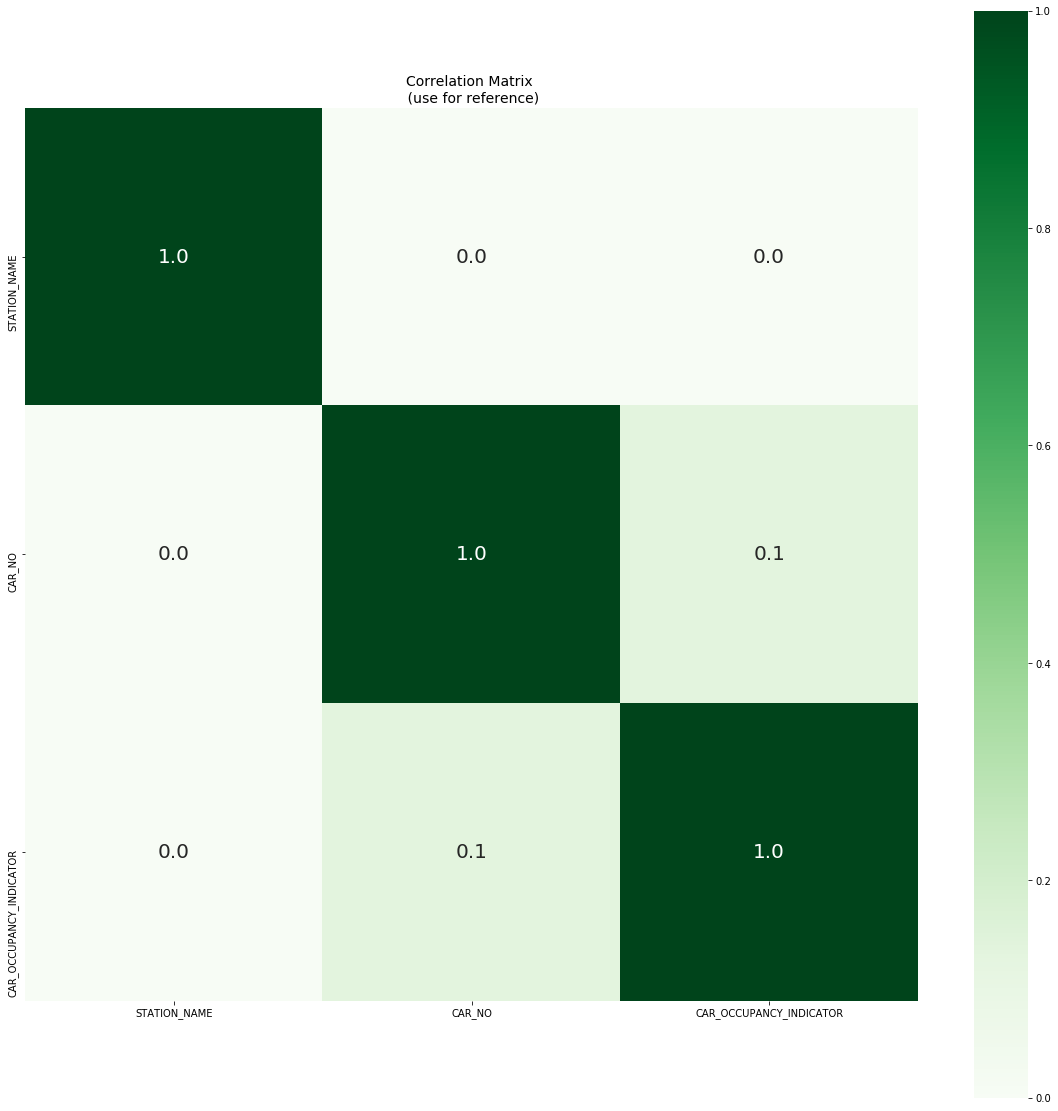

In [62]:
# Heatmap
corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [64]:
# Undersampling before cross validating (prone to overfit)
X = train_data.drop('CAR_OCCUPANCY_INDICATOR', axis=1)
y = train_data['CAR_OCCUPANCY_INDICATOR']

In [65]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [66]:
# A function to create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

In [67]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [69]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )

Total Accuracy :  20.0


In [70]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

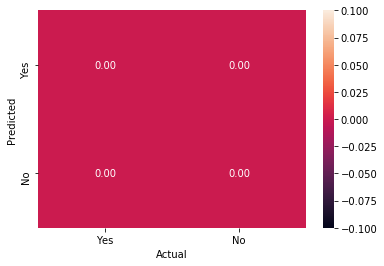

In [71]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [72]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
# Prediction on test set
y_pred = model.predict(X_test)

In [74]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )

Total Accuracy :  100.0


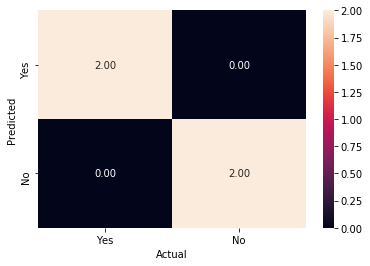

In [75]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [76]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [78]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]


No handles with labels found to put in legend.


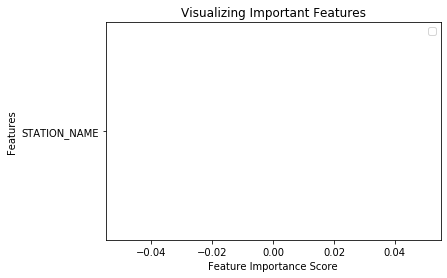

In [79]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [80]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [81]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

Total Accuracy :  100.0


In [82]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


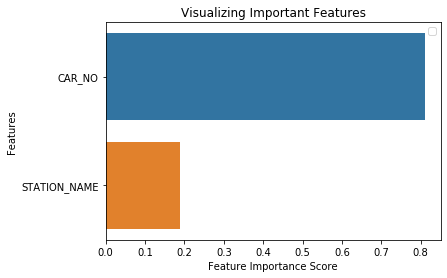

In [83]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [84]:
# Prediction on test data
y_pred = rf.predict(X_test)

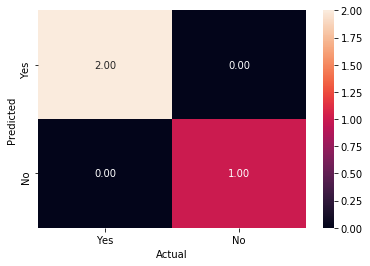

In [85]:
# Confusion metrix
draw_cm(y_test, y_pred)


In [86]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )

Total Accuracy :  80.0


In [87]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [89]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_knn )

Total Accuracy :  20.0


In [90]:
# eXtreme Gradient Boosting

# Import library of xgboost model
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# # A parameter grid for XGBoost for Hyperparameter Optimization
# parameters = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 5, 6]
#         }

# # Run the grid search
# grid_obj = GridSearchCV(gbm, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# gbm = grid_obj.best_estimator_

# Train the model using the training sets
gbm.fit(X_train, y_train)

[18:14:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_class=5,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [91]:
# Prediction on test data
y_pred = gbm.predict(X_test)

In [92]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  100.0


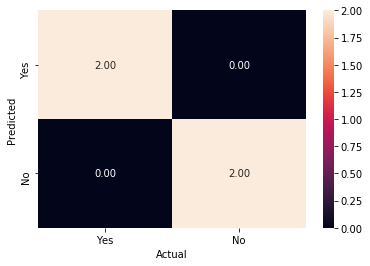

In [93]:
# Confusion matrix 
draw_cm(y_test, y_pred)

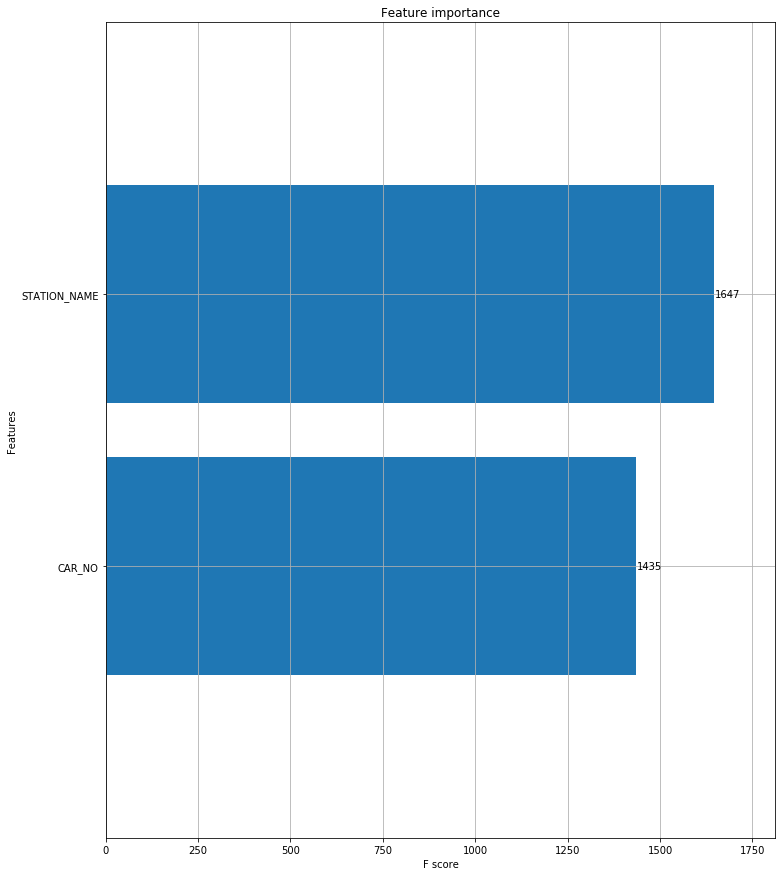

In [94]:
# Feature Engineering
fig, ax = plt.subplots(figsize=(12,15))
plot_importance(gbm, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [95]:
gbm.get_booster().get_score(importance_type="gain")

{'CAR_NO': 0.5442353211347976, 'STATION_NAME': 0.0007664730721685675}

In [96]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [99]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )

Total Accuracy :  20.0


In [100]:
## Evaluating and compairing models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,100.0
2,Decision Tree,100.0
6,XGBoost,100.0
3,Random Forest,80.0
0,Logistic Regression,20.0
4,Support Vector Machines,20.0
5,K - Nearest Neighbors,20.0


In [101]:
# Predicting on the test dataset
my_pred = gbm.predict(test_data)

ValueError: feature_names mismatch: ['STATION_NAME', 'CAR_NO'] ['STATION_NAME', 'CAR_NO', 'CAR_OCCUPANCY_INDICATOR']
training data did not have the following fields: CAR_OCCUPANCY_INDICATOR